In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk
import re

In [3]:
from wordcloud import WordCloud, ImageColorGenerator

## Import Dataset 

In [4]:
train = pd.read_csv('../dataset/train.csv')
test = pd.read_csv('../dataset/test.csv')

In [5]:
df_truncation = pd.read_csv('../dataset/Truncations.csv').set_index('index')
truncation = df_truncation.Truncation.to_dict()

## Preprocessing 

In [6]:
STOPWORDS = nltk.corpus.stopwords.words('english')

The regex tokenizer used here separates the words of a contiguous string into a list consisting of words only. "\w+" means that all word characters contiguous are turned into a list element.

In [7]:
TOKEN = nltk.tokenize.RegexpTokenizer(r"\w+")

Stemming is a set of algorithms for determining the root of words. For example, the root of the words "paint", "painted", "painting" is the same. However, since algorithms are used, incorrect word stems can also be calculated. It is not uncommon to get results like "peopl" for "peoples" or "poeple". Depending on the algorithm, the stemming can also become too strong because too much is taken away from the word. In this case we talk about overstemming.

An alternative approach is called lemmatization. Here the correct infinitive is taken from a stored guard book. This leads of course to the fact that not every word can be converted into its infinitive, since the lexicon is limited. In the following we use a lemmatization, because we want to build Wordclouds, which should contain real words.

In [8]:
LEMMATIZER = nltk.stem.WordNetLemmatizer()

In [9]:
def strip(x):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([0-9])"," ",x).split())   

truncations_re = re.compile('(%s)' % '|'.join(truncation.keys()))

#define function to expand contractions and showcase
def expand_contractions(s, contractions = truncation):
    def replace(match):
        return contractions[match.group(0)]
    return truncations_re.sub(replace, s)

def remove_stopwords(x):
    return ' '.join([i for i in x.split() if i not in STOPWORDS])

In [10]:
CLEAN = True

if CLEAN:
    for df in [train, test]:
        df['text'] = df['text'].str.lower()
        df['text'] = df['text'].apply(expand_contractions)
        df['text'] = df['text'].apply(strip)
        df['text'] = df['text'].apply(remove_stopwords)
        df['text'] = df['text'].apply(LEMMATIZER.lemmatize)

## WordCloud

In [11]:
f = train.loc[train.target==0, 'text'].to_list()
t = train.loc[train.target==1, 'text'].to_list()

In [12]:
def list_tostring(s):
    # initialize an empty string
    str1 = "" 
    
    # traverse in the string  
    for ele in s: 
        str1 += ' '
        str1 += ele  
    
    # return string  
    return str1 

F = list_tostring(f)
T = list_tostring(t)

In [13]:
def just(F, T):
    F_list = F.split()
    T_list = T.split()
    
    just_F = list_tostring([w for w in F_list if w not in T_list])
    just_T = list_tostring([w for w in T_list if w not in F_list])
    
    return just_F, just_T

just_F, just_T = just(F, T)

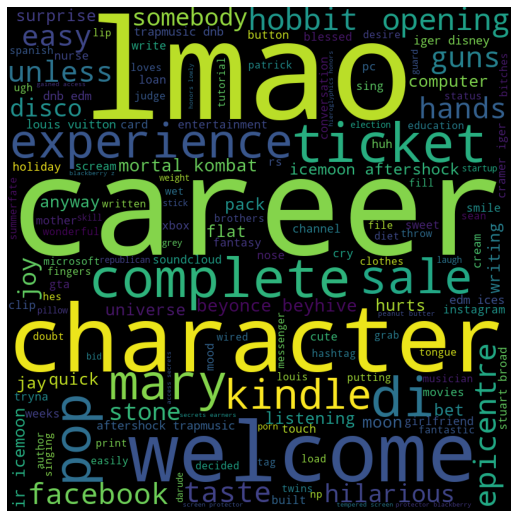

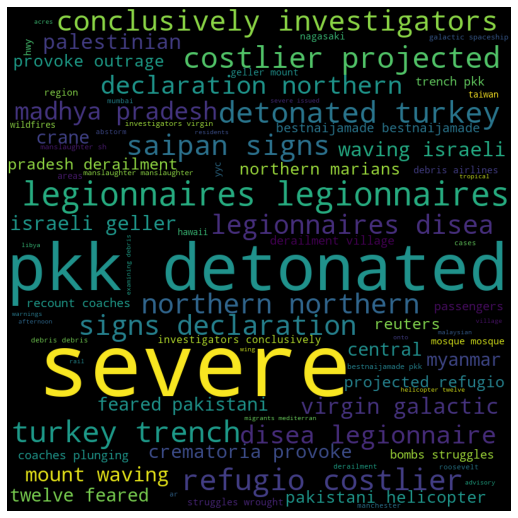

In [14]:
for i in [just_F, just_T]:
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='black',
                    stopwords = STOPWORDS,
                    min_font_size = 10).generate(i)

    # plot the WordCloud image                      
    plt.figure(figsize = (7, 15), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

In [15]:
Just_Real = nltk.probability.FreqDist()
Just_Fake = nltk.probability.FreqDist()

for w in just_T.split():
    Just_Real[w] +=1

for w in just_F.split():
    Just_Fake[w] +=1 

In [16]:
# def plotfreq(text):
#     Just_Rea